<a href="https://colab.research.google.com/github/medaminechafii/deeplearning-projects/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [8]:
X,y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
y = y.reshape(-1,1)

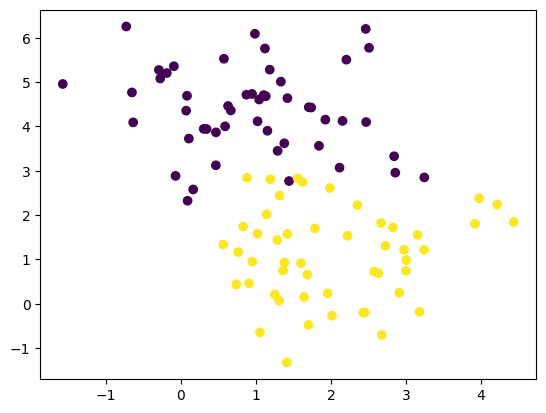

In [10]:
plt.scatter(X[:,0],X[:,1], c = y)

In [11]:
X.shape

(100, 2)

In [12]:
def init (X):
  W = np.random.randn(X.shape[1],1)
  b = 0
  return W,b

In [15]:
def model (X,W,b):
  Z = np.dot(X,W) + b
  A = 1/(1+np.exp(-Z))
  return A

In [16]:
def logloss(A,y):
  return -np.mean(y*np.log(A) + (1-y)*np.log(1-A))

In [22]:
def gradient(X,A,y):
  dW = 1/len(y)*np.dot(X.T,A-y)
  db = np.mean(A-y)
  return dW,db

In [23]:
def update(dW,db,W,b,alpha):
  W = W - alpha*dW
  b = b - alpha*db
  return W,b

In [26]:
def predict (X,W,b):
  A = model(X,W,b)
  return A>=0.5


In [27]:
def perceptron(X,y,alpha,epoch):
  W,b = init(X)
  loss = []
  for i in range(epoch):
    A = model(X,W,b)
    loss.append(logloss(A,y))
    dW,db = gradient(X,A,y)
    W,b = update(dW,db,W,b,alpha)
  y_pred = predict(X,W,b)
  print("Accuracy: ",np.mean(y_pred == y))
  plt.plot(loss)
  plt.show()
  return W,b

Accuracy:  0.89


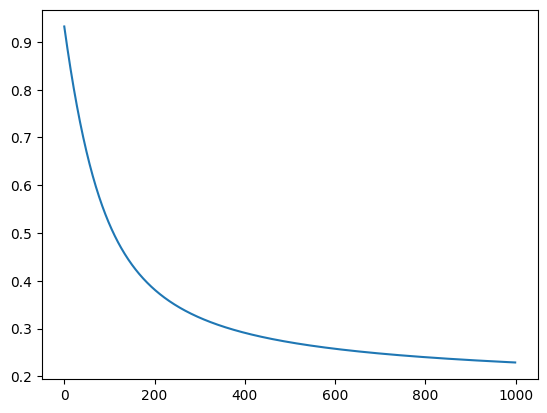

In [28]:
W,b = perceptron(X,y,0.01,1000)

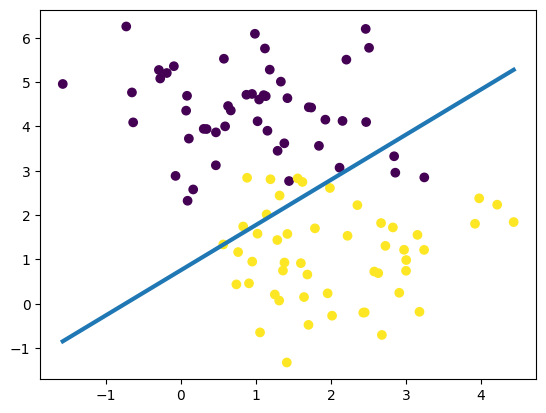

In [33]:
x0 = np.linspace(X[:,0].min(),X[:,0].max(),100)
x1 = (-W[0]*x0-b)/W[1]
plt.scatter(X[:,0],X[:,1], c = y)
plt.plot(x0,x1,lw = 3)
plt.show()